In [13]:
# importing the packages to use in the project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'https://raw.githubusercontent.com/sndaba/MoviesCorrelationInPython/main/movies.csv')


In [3]:
#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Checking to see if there is any missing data
# by using a loop through the data and see if there is anything missing
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [14]:
# rating, budget and gross showed missing values therefore,
# the missing values have been changed to '0' for intergers and 'NaN' for strings
df["rating"].fillna("NaN", inplace = True)
df["budget"].fillna(0, inplace = True)
df["gross"].fillna(0, inplace = True)

In [6]:
# Data Types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
# change data type of columns 'budget' and 'gross' to make them whole numbers
df['budget'] = df['budget'].astype('int64')
df['budget'] = df['budget'].astype('int64')

In [16]:
# drop any duplicate
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0.0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0.0,NaN,120.0


In [18]:
# Order our Data a little bit to see the highest grossing movie by 'gross' column

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0.000000e+00,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0.000000e+00,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104.0


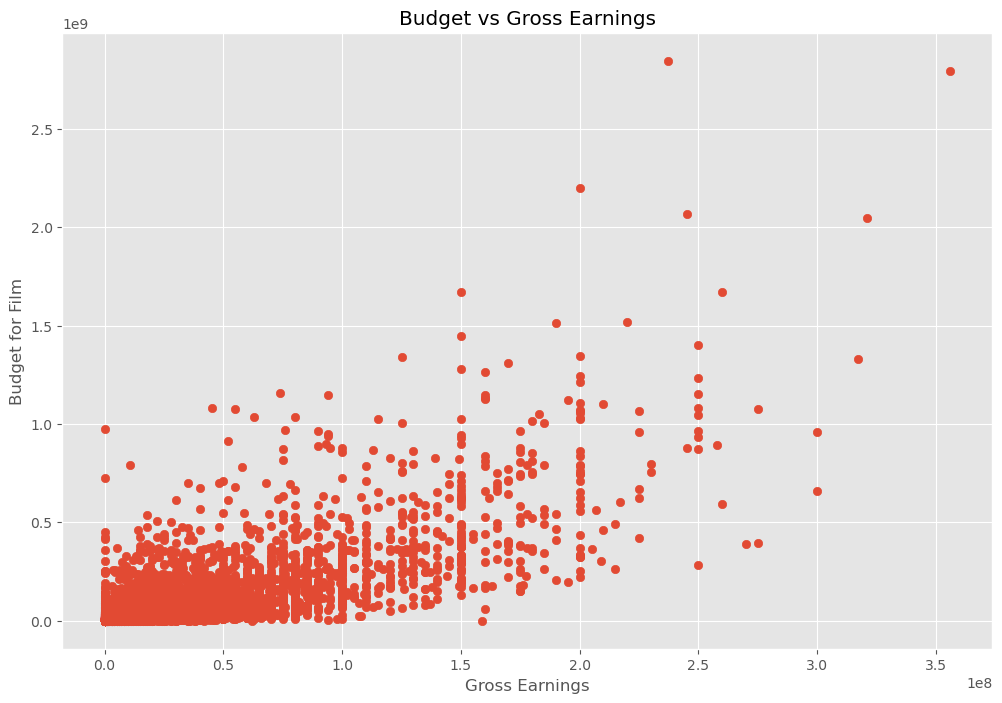

In [20]:
# scatter plot with 'budget' vs 'gross' column
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

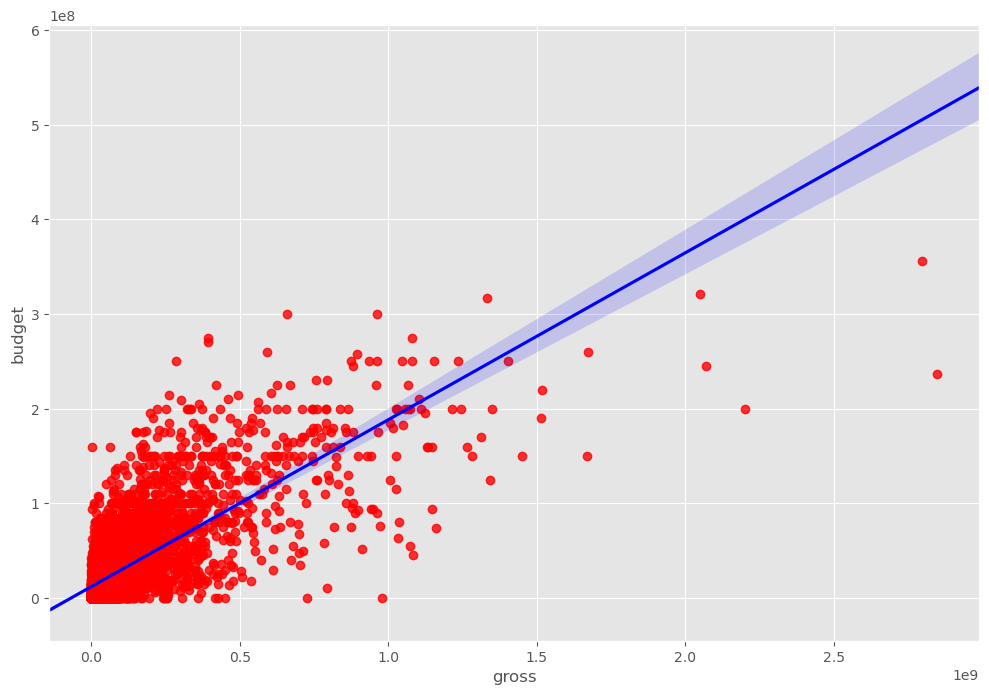

In [22]:
# plot 'budget' vs 'gross'
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [60]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [61]:
df.corr(method ='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [170]:
df.corr(method ='spearman')

,budget,gross,runtime,score,votes,year,grosstotal,countrygrosstotal
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.035936,NaN
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,-0.076909,NaN
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,-0.092817,NaN
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,-0.083826,NaN
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,-0.045118,NaN
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.062077,NaN
grosstotal,0.035936,-0.076909,-0.092817,-0.083826,-0.045118,0.062077,1.000000,NaN
countrygrosstotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


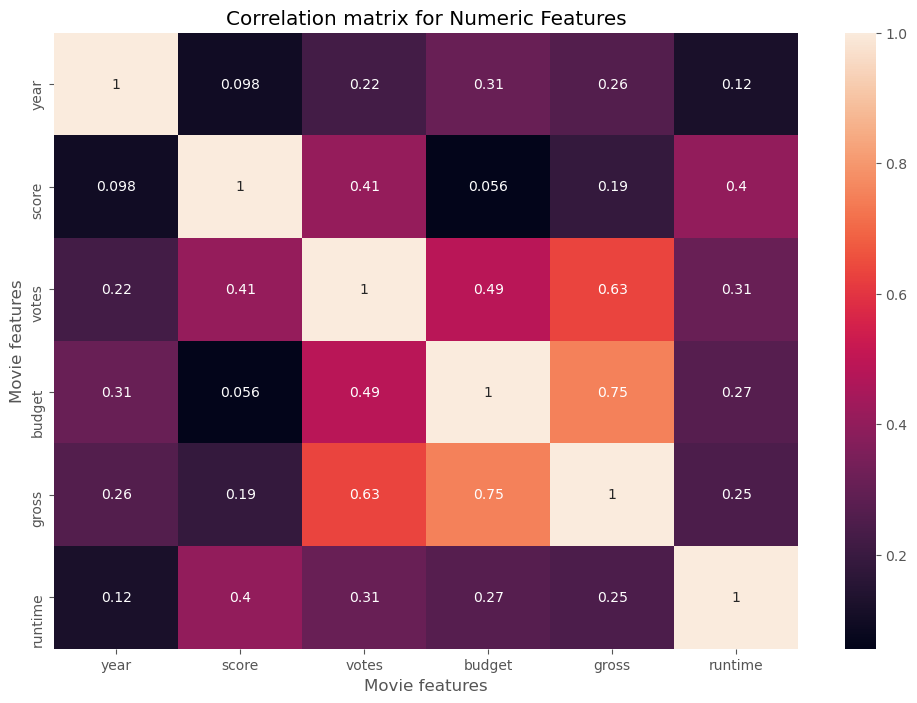

In [26]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0
1,5573,7,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0
2,5142,5,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0
3,286,5,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0
4,1027,7,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,3,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0.0,-1,90.0
7664,1678,3,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0.0,539,90.0
7665,4717,3,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0.0,941,NaN
7666,2843,3,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0.0,-1,120.0


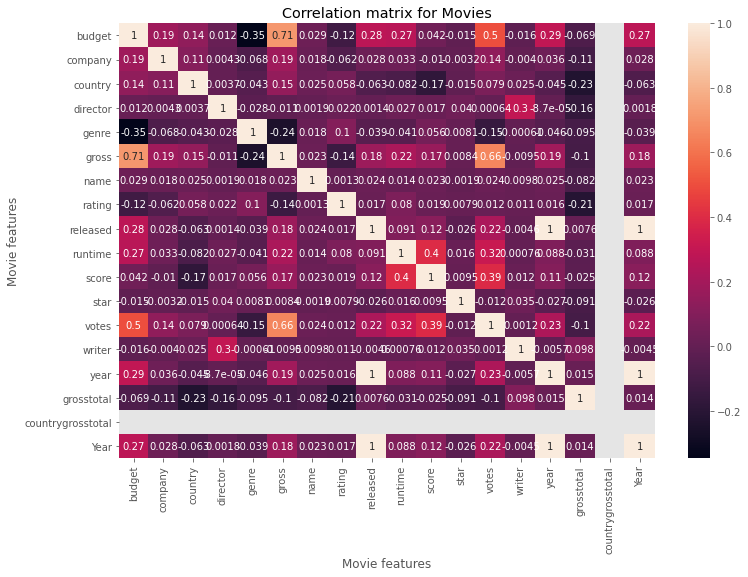

In [205]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [204]:
df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,-0.068548,NaN,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,-0.107676,NaN,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.226889,NaN,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,-0.164934,NaN,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.095361,NaN,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,-0.100710,NaN,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,-0.081830,NaN,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.016696,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,-0.211311,NaN,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025506,0.221736,-0.004634,0.996187,0.007605,NaN,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,-0.030870,NaN,0.088342


In [32]:
#A sorted linear pairing of the correlated columns
correlated_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values() # kind="quicksort")

print(sorted_pairs)

genre    budget    -0.334021
budget   genre     -0.334021
genre    gross     -0.234297
gross    genre     -0.234297
genre    votes     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [75]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  name        0.504802
name      director    0.504802
gross     director    0.507853
director  gross       0.507853
budget    writer      0.674068
writer    budget      0.674068
          votes       0.677493
votes     writer      0.677493
name      writer      0.695995
writer    name        0.695995
gross     writer      0.700464
writer    gross       0.700464
budget    votes       0.955916
votes     budget      0.955916
name      votes       0.960618
votes     name        0.960618
budget    name        0.965431
name      budget      0.965431
votes     gross       0.974594
gross     votes       0.974594
budget    gross       0.978268
gross     budget      0.978268
          name        0.984267
name      gross       0.984267
budget    budget      1.000000
rating    rating      1.000000
votes     votes       1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
name      name        1.000000
gross   

In [171]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,grosstotal,countrygrosstotal,Year
budget,1.000000,0.070302,-0.189282,0.480919,0.300018,0.978268,0.965431,-0.062005,0.370211,0.134315,0.009605,0.257396,0.955916,0.674068,-0.102399,0.020254,NaN,-0.099138
company,0.070302,1.000000,0.061540,0.155935,0.060236,0.101625,0.101876,0.000846,0.166275,-0.027840,0.031371,0.165490,0.089678,0.133796,0.105162,-0.008602,NaN,0.074285
country,-0.189282,0.061540,1.000000,-0.133631,-0.013013,-0.187801,-0.187762,0.124684,-0.051932,0.021056,0.012047,-0.054245,-0.181534,-0.146713,-0.004329,0.009149,NaN,-0.012557
director,0.480919,0.155935,-0.133631,1.000000,0.216499,0.507853,0.504802,-0.028938,0.292789,0.044193,0.036790,0.296325,0.497085,0.491595,0.030836,-0.009890,NaN,0.015255
genre,0.300018,0.060236,-0.013013,0.216499,1.000000,0.292627,0.288330,-0.024621,0.097809,0.031636,0.041309,0.098848,0.295037,0.230763,-0.003674,-0.017057,NaN,-0.003128
gross,0.978268,0.101625,-0.187801,0.507853,0.292627,1.000000,0.984267,-0.064561,0.422125,0.135257,0.013615,0.295385,0.974594,0.700464,-0.022809,0.019572,NaN,-0.026757
name,0.965431,0.101876,-0.187762,0.504802,0.288330,0.984267,1.000000,-0.065076,0.417623,0.130176,0.012255,0.292396,0.960618,0.695995,-0.023150,0.017110,NaN,-0.027272
rating,-0.062005,0.000846,0.124684,-0.028938,-0.024621,-0.064561,-0.065076,1.000000,-0.037900,0.035531,0.041838,0.000761,-0.060888,-0.056504,-0.013564,-0.010236,NaN,-0.020357
released,0.370211,0.166275,-0.051932,0.292789,0.097809,0.422125,0.417623,-0.037900,1.000000,0.070848,0.026386,0.211113,0.412720,0.315467,0.236153,-0.001076,NaN,0.225125
runtime,0.134315,-0.027840,0.021056,0.044193,0.031636,0.135257,0.130176,0.035531,0.070848,1.000000,0.054928,0.002983,0.137631,0.061594,0.011952,-0.005537,NaN,0.009247


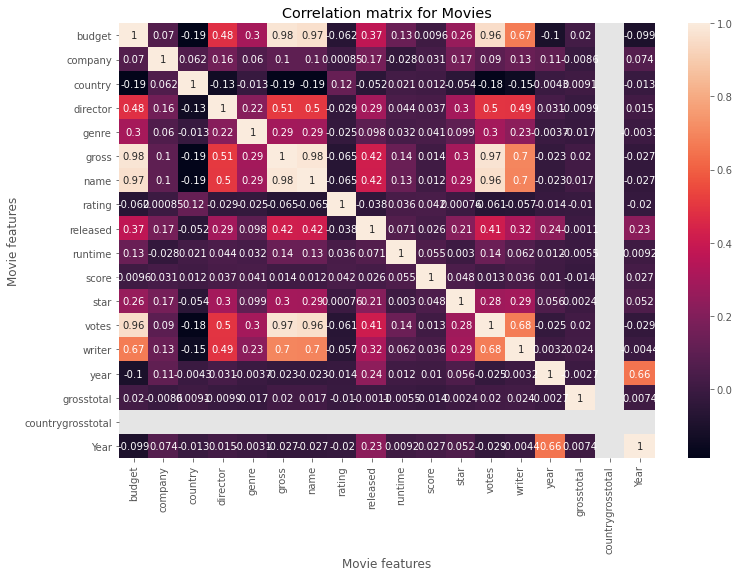

In [189]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

<AxesSubplot:>

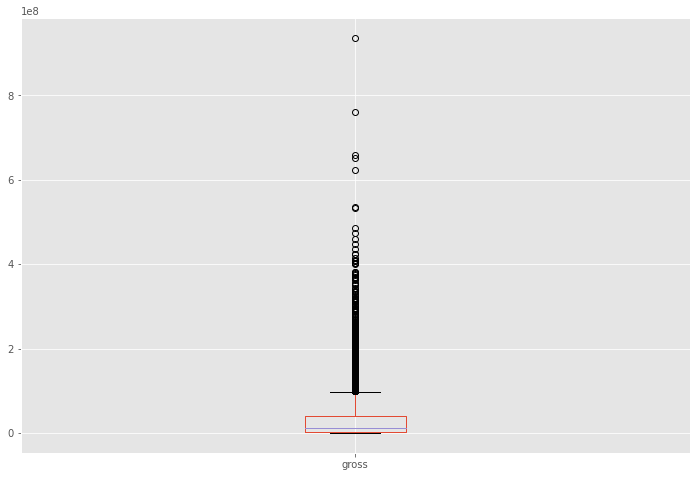

In [45]:
# Are there any Outliers?

df.boxplot(column=['gross'])

<AxesSubplot:xlabel='score', ylabel='gross'>

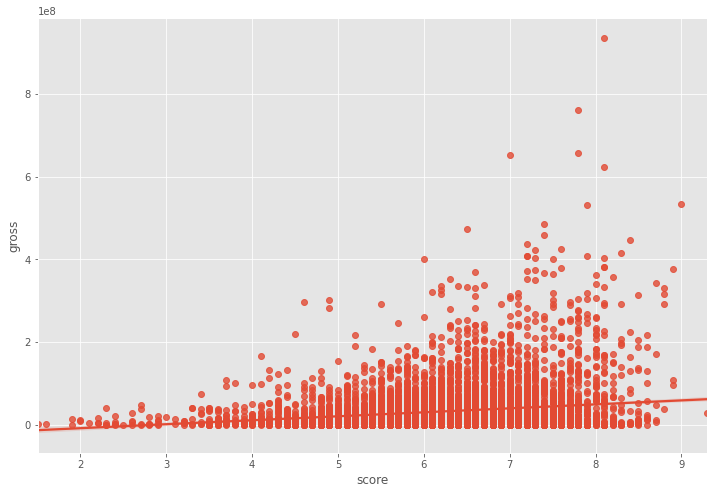

In [50]:
sns.regplot(x="score", y="gross", data=df)

In [196]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes